## **Titanic Dataset**

In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [9]:
x = pd.read_csv(r'C:\Users\prince\Documents\Pandas\CSV File\titanic dataset\train.csv')

In [11]:
x.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
x.shape

(891, 12)

In [46]:
x.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##Less people are survived in titanic

Survived
0    549
1    342
Name: count, dtype: int64

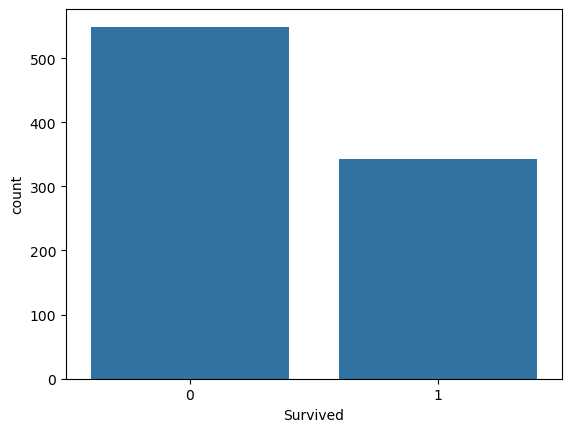

In [48]:
sns.countplot(x=x['Survived'])
x['Survived'].value_counts()

## Male are more killed or Male are less survived

<Axes: xlabel='Survived', ylabel='count'>

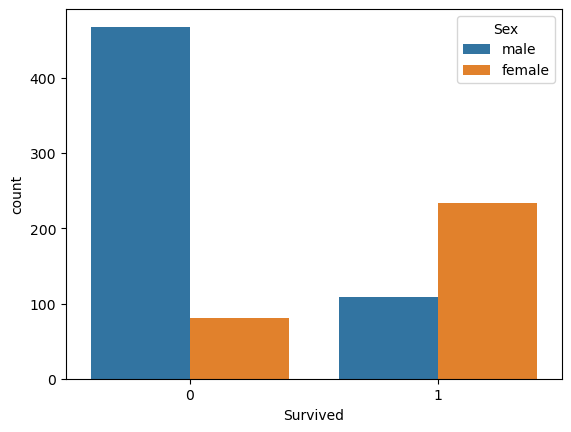

In [50]:
sns.countplot(x=x['Survived'],hue=x['Sex'])


## People of 1st class passenger are survived more
## People of 3rd class passenger are survived less

<Axes: xlabel='Survived', ylabel='count'>

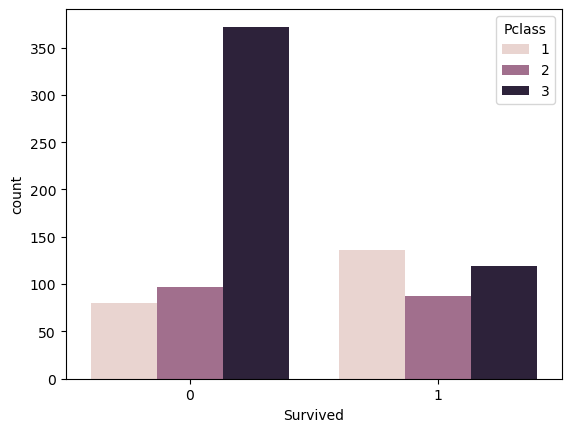

In [52]:
sns.countplot(x=x['Survived'],hue=x['Pclass'])

Age distribution : More young people were present on titanic

<Axes: xlabel='Age', ylabel='Count'>

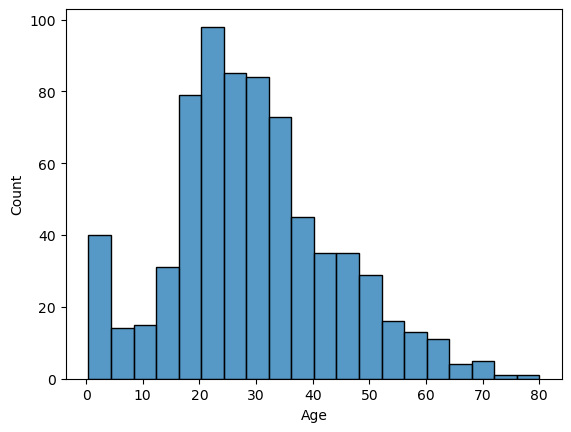

In [54]:
sns.histplot(x['Age'])

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

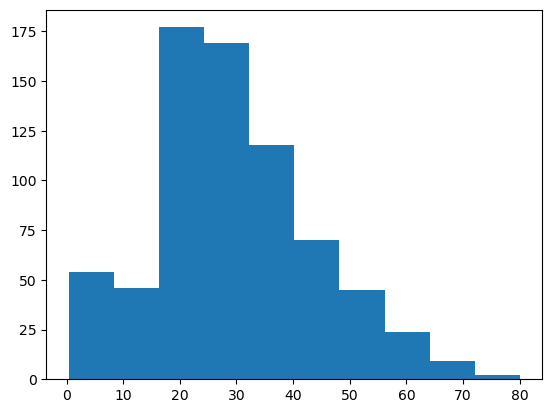

In [55]:
plt.hist(x['Age'])

In [56]:
x['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

## Analysis Fare

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

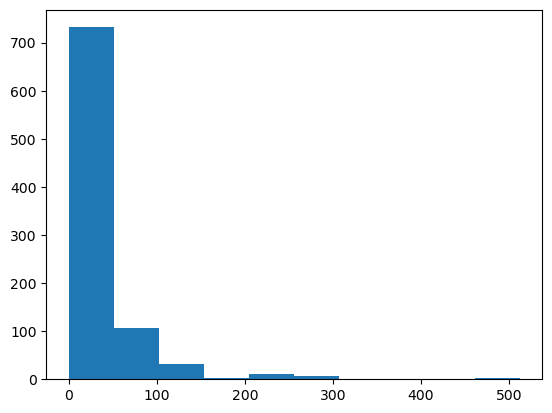

In [58]:
plt.hist(x['Fare'])

## Analyse SibSp : No sibling or spouse was present with passengers

<Axes: xlabel='SibSp', ylabel='count'>

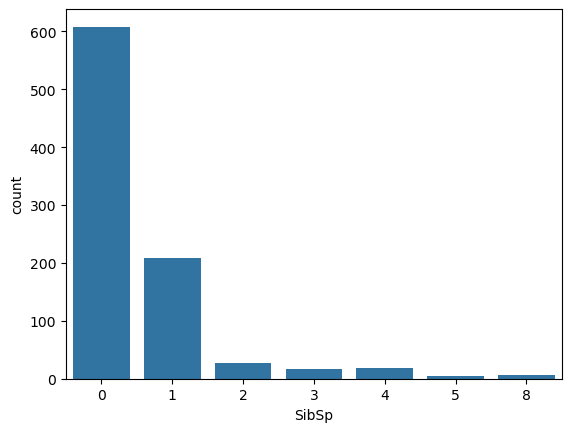

In [60]:
sns.countplot(x=x['SibSp'])

## Analyse Parch : No Parent or Children was present with passengers

<Axes: xlabel='Parch', ylabel='count'>

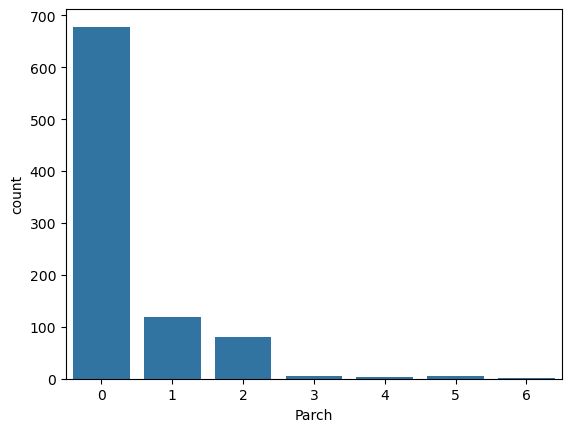

In [62]:
sns.countplot(x=x['Parch'])

### Data Wrangling : To clean data by removing nan or unwanted data

In [65]:
x.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

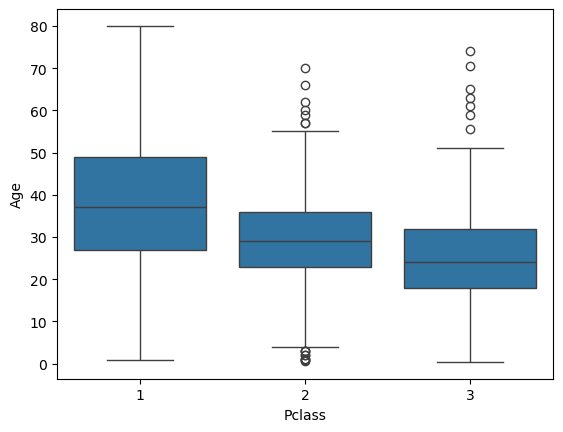

In [66]:
sns.boxplot(y=x['Age'],x=x['Pclass'])

<Axes: xlabel='Survived', ylabel='Age'>

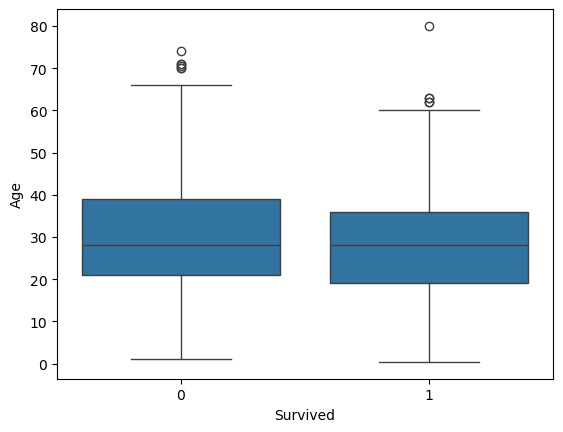

In [67]:
sns.boxplot(y=x['Age'],x=x['Survived'])

# Delete Cabin column due to more missing values

In [13]:
x.drop('Cabin',axis=1,inplace=True)

In [38]:
x.head(5)

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


<Axes: >

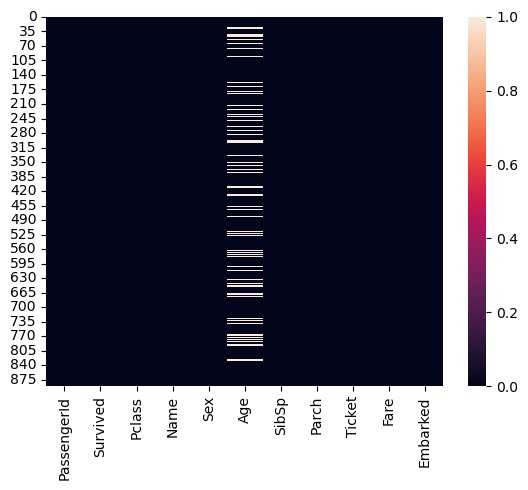

In [72]:
sns.heatmap(x.isnull())

Drop Missing values

In [17]:
x.dropna(inplace=True)

From heatmap , its clear that there is no missing vlaue in dataset

<Axes: >

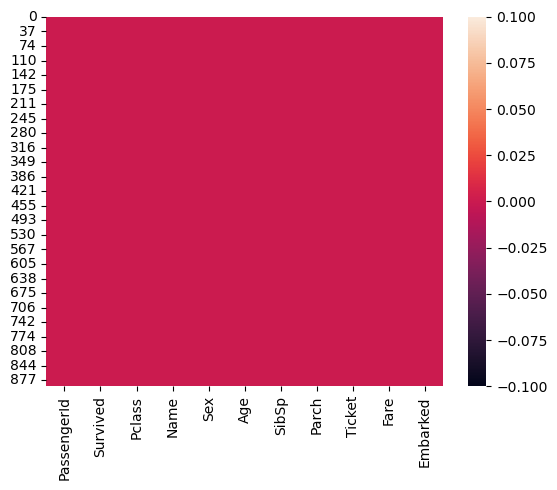

In [19]:
sns.heatmap(x.isnull())

In [21]:
x.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In order to do logistic regression , we need to convert string values to categorical variables

Convert Sex into dummy values()

In [34]:
sex=pd.get_dummies(x['Sex'],drop_first=True).astype(int)
sex.head(5)

KeyError: 'Sex'

In [23]:
x.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Embark**

In [17]:
embarked=pd.get_dummies(x['Embarked'],drop_first=True).astype(int)
embarked.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [19]:
pclass=pd.get_dummies(x['Pclass'],drop_first=True).astype(int)
pclass.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


**Remove old columns**

In [26]:
x.drop(['PassengerId','Name','Sex','Ticket','Pclass','Embarked'],axis=1,inplace=True)

In [28]:
x.head(3)

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250


**Add new columns**

In [36]:
x=pd.concat([x,sex,pclass,embarked],axis=1)

NameError: name 'sex' is not defined

In [ ]:
x.head(3)

Train & Test

In [29]:
X = x.drop('Survived',axis=1)
Y= x['Survived']

In [31]:
X['Age'].astype(int)

0      22
1      38
2      26
3      35
4      35
       ..
885    39
886    27
887    19
889    26
890    32
Name: Age, Length: 712, dtype: int32

In [94]:
X['Age'].dtypes

dtype('float64')

In [33]:
X=pd.DataFrame(X)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [37]:
model=LogisticRegression()

In [39]:
model.fit(x_train,y_train)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.